In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
data = np.loadtxt('../ex1-ov/ex1data1.txt') 
data
#X = 2 * np.random.rand(100,1)
#y = 4 +3 * X+np.random.randn(100,1)

ValueError: could not convert string to float: '6.1101,17.592'

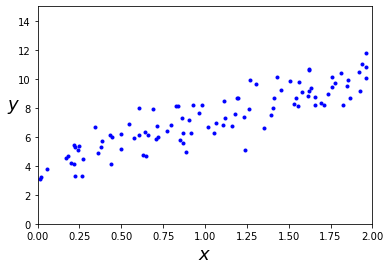

In [18]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [19]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.98519679]
 [3.18330426]]


In [20]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.98519679],
       [10.35180531]])

[0, 2, 0, 15]

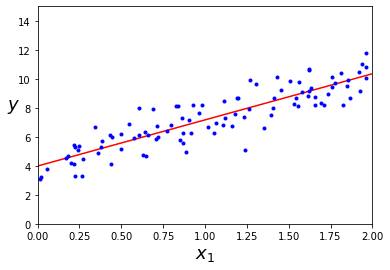

In [21]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

In [22]:
def computeCost(X, y, theta):
    m  = len(y)
    return (1 / (2 * m)) * np.sum(((X @ theta) - y) ** 2)

In [23]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    j_history = np.zeros(num_iters)
    theta_history = np.zeros((num_iters, 2))
    for itr in range(num_iters):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * alpha * (X.T.dot((prediction - y)))
        theta_history[itr,:] = theta.T
        j_history[itr] = computeCost(X, y, theta)
        return theta, j_history,theta_history


In [25]:
lr =0.01
n_iter = 1500

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradientDescent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.426,
Theta1:          1.578
Final cost/MSE:  0.000


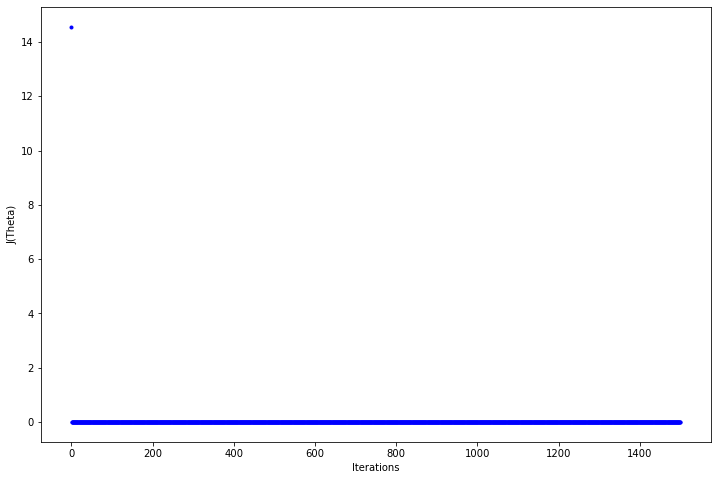

In [26]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')